In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [2]:
# Load data and store to df
import requests 

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

file_name = "laptops.csv"

response = requests.get(file_path)

# Make sure the dataset succesfully downloaded (status code 200)
if response.status_code == 200:
    # Open file in 'write binary' (wb) and save the content
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"File '{file_name}' berhasil diunduh.")
    
# Directly load file into pandas dataframe
    df = pd.read_csv(file_name)
    print("DataFrame berhasil dibuat.")
    df.head()
else:
    print(f"Gagal mengunduh file. Status code: {response.status_code}")

File 'laptops.csv' berhasil diunduh.
DataFrame berhasil dibuat.


In [3]:
# Print the 5 rows of the dataframe
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Standard Linear Regression

In [4]:
# Create linear regression object
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# Create linear regression with CPU_frequency as predictor and Price as response variable
x = df[['CPU_frequency']]
y = df['Price']

In [6]:
# Fit the linear model using CPU_frequency
lm.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Output a prediction
Yhat = lm.predict(x)
Yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

In [8]:
# Print the equation of prediction model
print('Price = ', lm.intercept_, ' + ', lm.coef_, 'CPU_frequency')

Price =  253.6611706858214  +  [1485.19362648] CPU_frequency


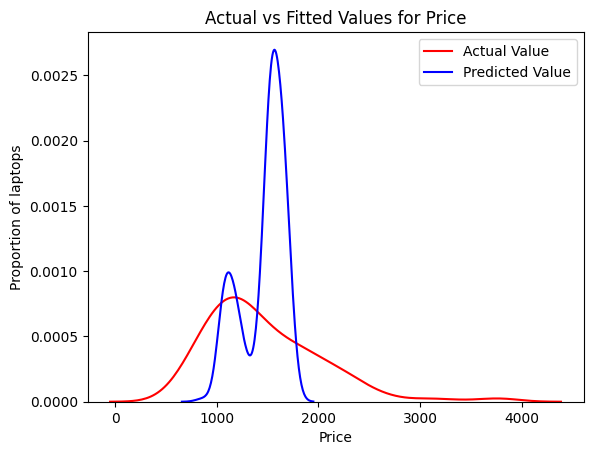

In [9]:
# Fitted values are very far to the actual values, because of that the linear regression model cannot be used to be prediction model
# Visualize CPU_frequency as potential predictor variable of Price
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [10]:
# Calculate MSE and r-squared for standard linear regression model
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(x, y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


### Multiple Linear Regression

In [11]:
# Store all independent variable into Z
z = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]

In [12]:
# Create multiple linear regression object
lm2 = LinearRegression()
lm2

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Fit the linear regression model using all independent variable above
lm2.fit(z, y)
Yhat2 = lm2.predict(z)

In [14]:
# Print the equation of prediction model
print('Price = ', lm2.intercept_, ' + ', lm2.coef_, 'CPU_frequency')

Price =  -841.9913259091256  +  [ 9.61283977e+02  8.68089292e+01  3.94604825e-01  6.56633979e+01
 -4.27445318e+02  9.78000871e+01  1.91295466e+02] CPU_frequency


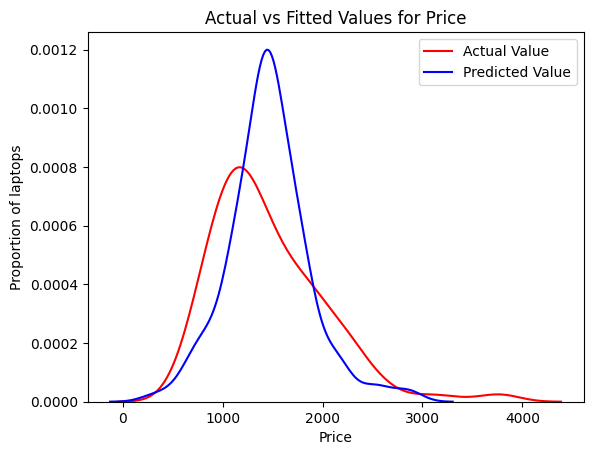

In [15]:
# Fitted values is better than the SLR model, but the difference is still far between actual value and predicted value
# Visualize z variable as potential predictor variable of Price
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [16]:
# Value of MSE for MLR is lower than MSE in SLR and value of r-squared for MLR is higher than r-squares in SLR so MLR gives the better model
# Calculate MSE and r-squared for standard linear regression model
mse_mlr = mean_squared_error(df['Price'], Yhat2)
r2_score_mlr = lm2.score(z, y)
print('The R-square for Linear Regression is: ', r2_score_mlr)
print('The mean square error of price and predicted value is: ', mse_mlr)

The R-square for Linear Regression is:  0.5082509055187376
The mean square error of price and predicted value is:  161680.57263893104


### Polinomial Regression

In [20]:
# 1 degree
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

# 3 degree
f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

# 5 degree
f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)

In [22]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

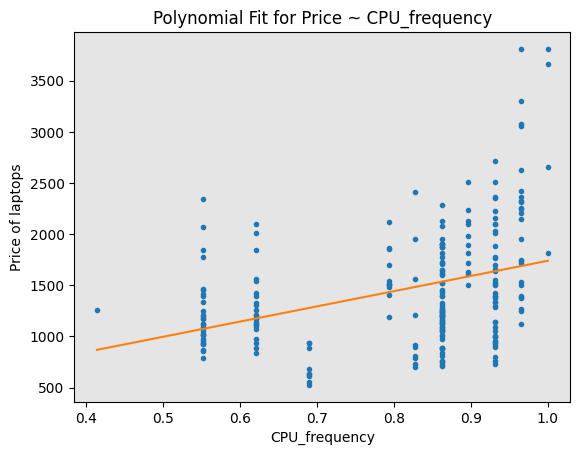

In [ ]:
# Get the required graph for degree 1
PlotPolly(p1, x, y, 'CPU_frequency')

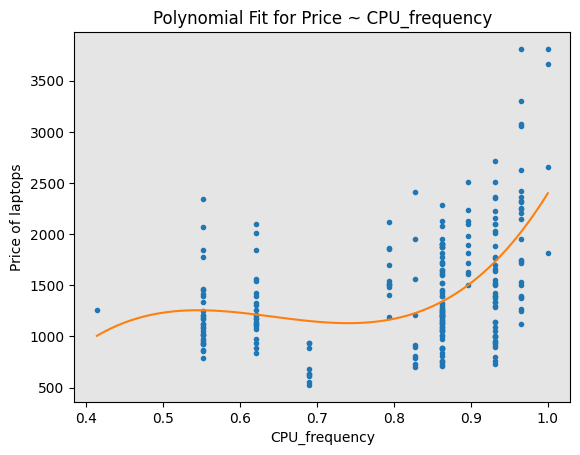

In [26]:
# Get the required graph for degree 3
PlotPolly(p3, x, y, 'CPU_frequency')

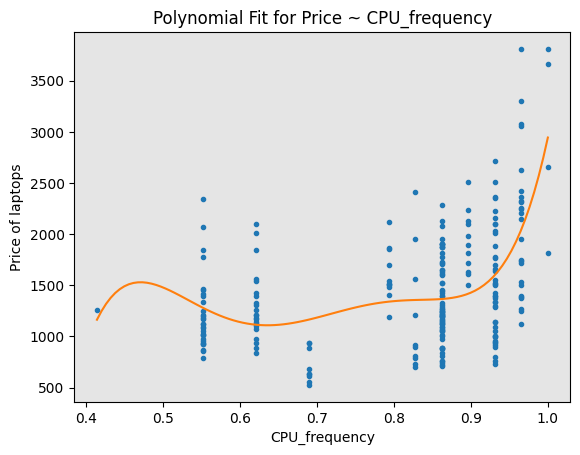

In [27]:
# Get the required graph for degree 5
PlotPolly(p5, x, y, 'CPU_frequency')

In [ ]:
# View the r-squared and MSE value of every degree
r_squared_1 = r2_score(y, p1(x))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(y,p1(x)))

r_squared_3 = r2_score(y, p3(x))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(y,p3(x)))

r_squared_5 = r2_score(y, p5(x))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(y,p5(x)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531075
The MSE value for 3rd degree polynomial is:  241024.86303848782
The R-square value for 5th degree polynomial is:  0.3030822706444096
The MSE value for 5th degree polynomial is:  229137.2954805286


In [29]:
# Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)

In [ ]:
# Values of R^2 increase from Single Linear Regression to Multiple Linear Regression. Further, for multiple linear regression extended with polynomial features, value of r-squared is increase.
# Evaluate the MSE and R^2 values for the this predicted output
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.86128028373
R^2 for multi-variable polynomial pipeline is:  0.6332094535859658
